In [103]:
import pandas as pd

# Đường dẫn đến tệp Excel
file_path = './input/label.xlsx'

# Đọc tệp Excel
datatimeOA = pd.read_excel(file_path)

# Hiển thị các dòng đầu tiên của DataFrame
print(datatimeOA.head())
datatimeOA['StartDate'] = pd.to_datetime(datatimeOA['StartDate'], format='%H:%M:%S')

# Tính toán endDate bằng cách thêm duration (tính bằng giờ) vào StartDate
datatimeOA['endDate'] = datatimeOA['StartDate'] + pd.to_timedelta(datatimeOA['duration'], unit='s')

# Hiển thị các dòng đầu tiên của DataFrame sau khi tính toán
print(datatimeOA.head())

  StartDate  duration  hy
0  12:43:06     18.49  hy
1  12:44:55     13.36  hy
2  12:46:27     10.55  hy
3  12:46:41     10.60  hy
4  12:46:56     10.80  hy
            StartDate  duration  hy                 endDate
0 1900-01-01 12:43:06     18.49  hy 1900-01-01 12:43:24.490
1 1900-01-01 12:44:55     13.36  hy 1900-01-01 12:45:08.360
2 1900-01-01 12:46:27     10.55  hy 1900-01-01 12:46:37.550
3 1900-01-01 12:46:41     10.60  hy 1900-01-01 12:46:51.600
4 1900-01-01 12:46:56     10.80  hy 1900-01-01 12:47:06.800


In [104]:
datatimeOA['endDate'] = pd.to_datetime(datatimeOA['endDate'], format='%H:%M:%S:%f')

In [105]:
import pandas as pd

# Đường dẫn đến tệp Excel
file_path = './input/flowcmh20.xlsx'

# Đọc tệp Excel
flowData = pd.read_excel(file_path)



# Hiển thị các dòng đầu tiên của DataFrame
print(flowData.head())

           time     value
0  00:37:05:162  0.148586
1  00:37:05:167  0.148548
2  00:37:05:172  0.148485
3  00:37:05:177  0.148397
4  00:37:05:182  0.148284


In [106]:
def convert_hour_to_12(dt):
    if dt.hour == 0:
        return dt.replace(hour=12)
    return dt

In [107]:
flowData['time'] = pd.to_datetime(flowData['time'], format='%H:%M:%S:%f')
flowData['time'] = flowData['time'].apply(convert_hour_to_12)
flowData['nhan'] = 0
print(flowData.head())

                     time     value  nhan
0 1900-01-01 12:37:05.162  0.148586     0
1 1900-01-01 12:37:05.167  0.148548     0
2 1900-01-01 12:37:05.172  0.148485     0
3 1900-01-01 12:37:05.177  0.148397     0
4 1900-01-01 12:37:05.182  0.148284     0


In [108]:
for index, row in datatimeOA.iterrows():
    mask = (flowData['time'] >= row['StartDate']) & (flowData['time'] <= row['endDate'])
    flowData.loc[mask, 'nhan'] = 1
    

print(flowData.head())

                     time     value  nhan
0 1900-01-01 12:37:05.162  0.148586     0
1 1900-01-01 12:37:05.167  0.148548     0
2 1900-01-01 12:37:05.172  0.148485     0
3 1900-01-01 12:37:05.177  0.148397     0
4 1900-01-01 12:37:05.182  0.148284     0


In [109]:
flowData_nhan_1 = flowData[flowData['nhan'] == 1]
print(flowData_nhan_1)

                           time     value  nhan
72168   1900-01-01 12:43:06.002 -0.065932     1
72169   1900-01-01 12:43:06.007 -0.065745     1
72170   1900-01-01 12:43:06.012 -0.065540     1
72171   1900-01-01 12:43:06.017 -0.065319     1
72172   1900-01-01 12:43:06.022 -0.065085     1
...                         ...       ...   ...
1048570 1900-01-01 02:04:28.012  0.196029     1
1048571 1900-01-01 02:04:28.017  0.203181     1
1048572 1900-01-01 02:04:28.022  0.210161     1
1048573 1900-01-01 02:04:28.027  0.216970     1
1048574 1900-01-01 02:04:28.032  0.223612     1

[598923 rows x 3 columns]


In [110]:
import math
def create_training_data(data, window_size, step_size):

    _train = []
    _label = []

    for i in range(0, data.shape[0] - window_size, step_size):
        try:
            xs = data['value'].values[i: i + window_size]
        
            # Skip examples where the activity label changes within the window.
            if (data['nhan'][i+1] != data['nhan'][i + window_size-1]):
                print(f"Skipping index {i} due to label change within window.")
                continue

            label = data['nhan'][i + window_size-1]

            # Skip examples where the label is NaN.
            if math.isnan(label):
                print(f"Skipping index {i} due to NaN label.")
                continue

            _train.append(xs)
            _label.append(label)
        
        except Exception as e:
            print(f"An error occurred at index {i}: {e}")

    return _train, _label

In [111]:
_train, _label = create_training_data(
    data=flowData, window_size=4000, step_size=1000)

Skipping index 69000 due to label change within window.
Skipping index 70000 due to label change within window.
Skipping index 71000 due to label change within window.
Skipping index 73000 due to label change within window.
Skipping index 74000 due to label change within window.
Skipping index 75000 due to label change within window.
Skipping index 90000 due to label change within window.
Skipping index 91000 due to label change within window.
Skipping index 92000 due to label change within window.
Skipping index 94000 due to label change within window.
Skipping index 95000 due to label change within window.
Skipping index 96000 due to label change within window.
Skipping index 109000 due to label change within window.
Skipping index 110000 due to label change within window.
Skipping index 112000 due to label change within window.
Skipping index 114000 due to label change within window.
Skipping index 115000 due to label change within window.
Skipping index 118000 due to label change w

In [112]:
import numpy as np


(128, 8)


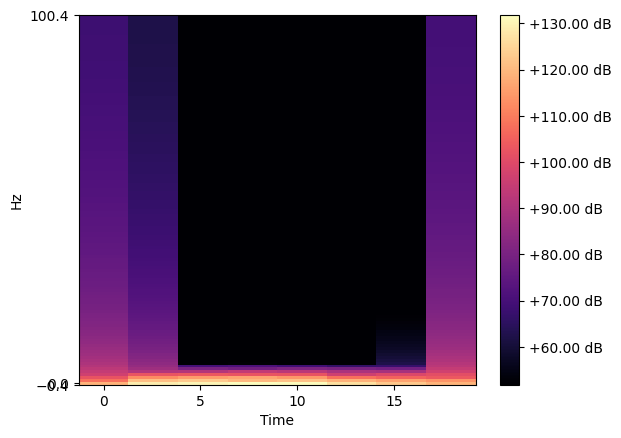

In [113]:
import librosa.display
import matplotlib.pyplot as plt
audio_data = _train[0]

audio_data = np.array(audio_data).astype("float")
sgram = librosa.stft(audio_data)
# librosa.display.specshow(sgram)
sgram_mag, _  = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr =4000)
print(mel_scale_sgram.shape)
# librosa.display.specshow(mel_scale_sgram)
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram , ref=np.min)
librosa.display.specshow(mel_sgram ,sr =200, x_axis="time", y_axis="mel")
plt.colorbar(format='%+0.2f dB')

In [114]:
import librosa
import librosa.display
import torch
import tensorflow
def calcuMelSgram(signal):
  sgram = librosa.stft(signal)  
  sgram_mag, _  = librosa.magphase(sgram)
  mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr = 4000)
  mel_sgram = librosa.amplitude_to_db(mel_scale_sgram , ref=np.min)
  # t = torch.Tensor(mel_sgram)
  # t = tensorflow.convert_to_tensor(mel_sgram, dtype=tensorflow.float32)
  return mel_sgram

In [115]:
trainMFE = []
for i in range(len(_train)):
  audio_data = np.array(_train[i]).astype("float")
  trainMFE.append(calcuMelSgram(audio_data))

In [116]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(trainMFE, _label, test_size=0.2, random_state=42)


x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [117]:
print(x_train[0].shape)

(128, 8)


In [118]:
x_train_array = np.array(x_train.tolist())

x_train_reshaped = x_train_array.reshape(x_train_array.shape[0], 128, 8, 1)

x_train_reshaped = x_train_reshaped.astype('float32')


x_test_array = np.array(x_test.tolist())

x_test_reshaped = x_test_array.reshape(x_test_array.shape[0], 128, 8, 1)

x_test_reshaped = x_test_reshaped.astype('float32')


from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print(x_train_array.shape)
print(x_test_array.shape)
print(y_train_encoded.shape)
print(y_test_encoded.shape)
print(y_train_encoded)


(506, 128, 8)
(127, 128, 8)
(506, 2)
(127, 2)
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [119]:
import numpy as np
from keras.optimizers import RMSprop,Adam






# x_train_tf = np.array([data.reshape(-1, 128, 87, 1) for data in train_df["acoustic_data"]])

# x_test_tf = np.array([data.reshape(-1, 128, 87, 1) for data in test_df["acoustic_data"]])


from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,8,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))


optimizer = Adam(learning_rate=0.0005, beta_1=0.95, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# In tóm tắt mô hình
model.summary()

# Huấn luyện mô hình
history = model.fit(x_train_reshaped, y_train_encoded, epochs=500, validation_data=(x_test_reshaped, y_test_encoded))

# Đánh giá mô hình
test_loss, test_acc = model.evaluate(x_test_reshaped, y_test_encoded)
print('Test accuracy:', test_acc)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 128, 8, 8)         208       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 64, 4, 8)          0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 64, 4, 8)          0         
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 4, 16)         1168      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 32, 2, 16)         0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 32, 2, 16)        